In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read Data
data =pd.read_excel('/content/drive/MyDrive/Thesis/Shared/DFBA Train Data.xlsx')
data_df = data[:][0:6478]
text_data = data_df["text"]
labels = data_df["label2"]
classes = data_df['class2']
labels.value_counts()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:211: UserWarning: Cell E4661 is marked as a date but the serial value 6691519.586805556 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


no          2746
moderate    1670
severe      1031
mild        1031
Name: label2, dtype: int64

In [ ]:
def make_two_class(data_df):
  tag_list = []
  for i in range(len(data_df)):
      if data_df.label2[i] == 'no': 
        tag = "non-depressed"
        tag_list.append(tag)
      else: 
        tag = "depressed"      
        tag_list.append(tag)   
  data_df['tag'] = tag_list 
  return data_df
new_df = make_two_class(data_df)

In [ ]:
def make_two_tag_droping(data_df):
  tag_list = []
  text_list = []
  time = []
  for i in range(len(data_df)):

      if (data_df.class2[i] == 'anger' or data_df.class2[i] ==  'disapproval' or data_df.class2[i] == 'disgust'): 
        tag = "depressive"
        tag_list.append(tag)
        text_list.append(data_df.text[i])
        time.append(data_df.timestamp[i])
      elif (data_df.class2[i] == 'fear' or data_df.class2[i] ==  'nervousness' or data_df.class2[i] ==  'embarrassment' or data_df.class2[i] ==  'remorse'): 
        tag = "depressive"
        tag_list.append(tag)
        text_list.append(data_df.text[i])
        time.append(data_df.timestamp[i])
      elif (data_df.class2[i] == 'sadness' or data_df.class2[i] == 'disappointment'): 
        tag = "depressive"
        tag_list.append(tag)
        text_list.append(data_df.text[i])
        time.append(data_df.timestamp[i])
  
  new_df = pd.DataFrame(list(zip(time,  tag_list, text_list)), columns = ['timestamp', 'label', 'text'])   

  return new_df
new_df = make_two_tag_droping(data_df)

In [ ]:
data_df = new_df

In [ ]:
# convert datetime column to just date
data_df['Date'] = pd.to_datetime(data_df['timestamp'], errors='coerce', format='%Y-%m-%d %H:%M:%S').dt.date

In [ ]:
# convert datetime column to just hour
data_df['Hour'] = pd.to_datetime(data_df['timestamp'], errors='coerce', format='%Y-%m-%d %H:%M:%S').dt.hour

In [ ]:
data_df.tail(10)

In [ ]:
data_df['count'] = 1
data_filtered = data_df[['Hour', 'Date', 'count']]


In [ ]:

data_filtered = data_df[[ 'Date', 'label2']]

In [ ]:
data_filtered.head()

,Date,label2
0,2020-04-15,severe
1,2020-04-07,severe
2,2020-04-01,severe
3,2020-02-20,moderate
4,2020-01-31,moderate


In [ ]:
data_filtered.tail(5)

,Hour,Date,count
6473,14.0,2022-01-12,1
6474,9.0,2022-01-12,1
6475,23.0,2022-01-10,1
6476,22.0,2022-01-10,1
6477,16.0,2021-11-25,1


In [ ]:
df_tweets_hourly = data_filtered.groupby(["Hour"]).sum().reset_index()


In [ ]:
df_tweets_hourly.head(10)
# We have 113298 tweets for oth hour

In [ ]:
# Lets plot hor vs count
sns.set(style="white")
sns.lmplot(x="Date", y="count",order=2, ci=None, scatter_kws={"s": 80}, data=data_filtered)
#plt.savefig('/content/drive/MyDrive/Thesis/Time-series/continious_hour_vs_count.eps',dpi= 1000, format='eps')
# No of tweets being posted have this good sinosoidal trend 

In [ ]:
# Lets plot hor vs count
sns.set(style="white")
sns.lmplot(x="Date", y="label2",order=2, ci=None, scatter_kws={"s": 80}, data=data_filtered)
plt.savefig('/content/drive/MyDrive/Thesis/Time-series/continious_hour_vs_count.eps',dpi= 1000, format='eps')
# No of tweets being posted have this good sinosoidal trend 

In [ ]:
data_filtered.to_csv('tableau.csv', index=False)
# Save for a tableau viz

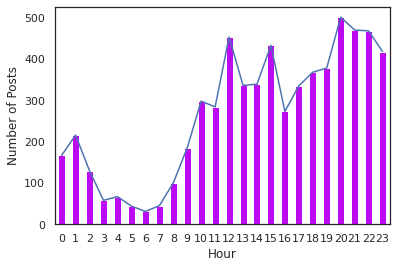

In [ ]:
fig=plt.figure(num=None, facecolor='w', edgecolor='k')

df_tweets_hourly["count"].plot.bar(color='#BC0AF3')
df_tweets_hourly["count"].plot()
plt.xlabel("Hour")
plt.ylabel("Number of Posts")
plt.show()
fig.savefig('/content/drive/MyDrive/Thesis/Time-series/box_hour_vs_count.eps',dpi= 1000, format='eps')


# This is also a good way to visualize tweets/hour